### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Import Libraries

In [231]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-231-6bcb8909ac2b>", line 3, in <module>
    get_ipython().run_line_magic('cd', '/gdrive')
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2314, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/magics/osm.py", line 334, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (mo

OSError: ignored

## Load Data

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
df = pd.read_csv('/gdrive/MyDrive/Salinan online_retail_II.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Section 1

### Create New Feature: Year

Pertama, kita rubah tipe data pada `InvoiceDate` dari `object` menjadi `datetime`, baru kita membuat kolom baru `year`.

In [233]:
# rubah dtype object menjadi datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
#membuat Feature baru Year
df['Year']=df['InvoiceDate'].dt.year
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


nah sekarang sudah ditambahkan feature `Year` yang diambil dari `InvoiceData`.

### Filtering Data

#### Remove 'Quantity` with value <1

In [234]:
df_sales = df.drop(df[df['Quantity']<1].index)
print(f'RangeIndex dataframes: {len(df.index)}')
print(f'RangeIndex filtered Quantity: {len(df_sales)}')
print(f'Data value <1/ selisih: {len(df.index)-len(df_sales)}')


RangeIndex dataframes: 1067371
RangeIndex filtered Quantity: 1044421
Data value <1/ selisih: 22950


Terdapat 22950 data yang memiliki data `Quantity` `<1`.

#### Remove cancel Invoice

In [235]:

print(f'RangeIndex filtered Quantity: {len(df_sales)}')
df_filtered= df_sales.drop(df_sales[df_sales['Invoice'].str.contains('C', case=False)].index)
print(f'RangeIndex Setelah filter Cancel Invoice: {len(df_filtered)}')
print(f'cancel Invoice/ selisih: {len(df_sales)-len(df_filtered)}')

RangeIndex filtered Quantity: 1044421
RangeIndex Setelah filter Cancel Invoice: 1044420
cancel Invoice/ selisih: 1


### Create New Feature: Revenue

In [236]:
df_filtered['Revenue']= df_filtered['Quantity']*df_filtered['Price']
df_filtered.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### Average of Revenue per Year

pastikan value pada `Year` hanya ada `2009, 2010, 2011`

In [237]:
uniques=df_filtered['Year'].value_counts()
print(uniques)


2010    510694
2011    489603
2009     44123
Name: Year, dtype: int64


In [238]:
avg2009 = df_filtered[df_filtered['Year']==2009]['Revenue'].mean()
avg2010 = df_filtered[df_filtered['Year']==2010]['Revenue'].mean()
avg2011 = df_filtered[df_filtered['Year']==2011]['Revenue'].mean()
print(f'Rata-rata tahun 2009: {"{:.3f}".format(avg2009)}')
print(f'Rata-rata tahun 2010: {"{:.3f}".format(avg2010)}')
print(f'Rata-rata tahun 2011: {"{:.3f}".format(avg2011)}')
# "{:.3f}".format() digunakan untuk merubah format number menjadi string dan
#  hanya menampilkan 3 angka di belakang koma.

Rata-rata tahun 2009: 18.713
Rata-rata tahun 2010: 19.909
Rata-rata tahun 2011: 20.059


<function matplotlib.pyplot.show(close=None, block=None)>

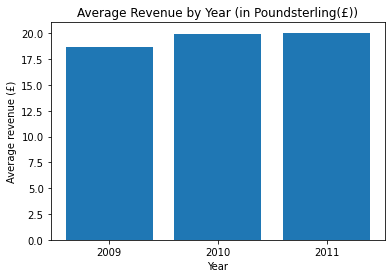

In [249]:

year = [2009, 2010, 2011]
avgRevenue = [avg2009, avg2010, avg2011]

plt.bar(year, avgRevenue)

plt.title('Average Revenue by Year (in Poundsterling(£))')
plt.xlabel('Year')
plt.ylabel('Average revenue (£)')
plt.xticks(year) #ini digunakan untuk menampilkan hanya tahun 2009, 2010, 2011
plt.show

### Interpretation

1. Penambahan fitur `Year` digunakan untuk mempermudah menganalisa perkembangan pertahunnya. unutk mendapatkannya hanya menkonversi `Invoice date` yang diambil tahunnya saja.  
2. untuk mendapatkan revenue yang valid dilakukan filtering dengan kriteria `Quantity` memiliki value `<1` dan bukan cancel Invoice (`Invoice` tidak berkode `C`).
3. dari diagram diatas terlihat untuk rata-rata pendapatan per tahunnya terus terjadi kenaikan dari `2009` ke `2010` sebanyak +-5% dan di tahun `2010` ke `2011` sangat tipis kurang dari 1%.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [250]:
df_filtered= df_sales.drop(df_sales[df_sales['Invoice'].str.contains('C', case=False)].index)
df_finished = df_filtered.dropna(subset=['Customer ID'])
print(f'range Index filtered CustomerID: {len(df_finished)}')
print(f'data Customer ID null yang terhapus: {len(df_filtered.index)-len(df_finished)}')

range Index filtered CustomerID: 805620
data Customer ID null yang terhapus: 238800


#### Customers who cancelledd their purchases

In [251]:
df_cancel = df[df['Invoice'].str.contains('C', case=False)]
print(f'RangeIndex dataframes: {len(df.index)}')
print (f'Jumlah Cancel Invoice: {len(df_cancel)}')

RangeIndex dataframes: 1067371
Jumlah Cancel Invoice: 19494


### Number of Finished and Cancelledd Transactions Each Year

#### Finished Transactions

In [252]:
dfUniques=df_filtered['Year'].value_counts()
finishedUniques=df_finished['Year'].value_counts()
print(f'total Transaksi valid per-tahun : \n{dfUniques}\n')
print(f'total finished per-tahun: \n{finishedUniques}')


total Transaksi valid per-tahun : 
2010    510694
2011    489603
2009     44123
Name: Year, dtype: int64

total finished per-tahun: 
2010    403094
2011    371765
2009     30761
Name: Year, dtype: int64


#### Cancelled Transactions

In [253]:
dfUniques=df['Year'].value_counts()
cancelledUniques=df_cancel['Year'].value_counts()
print(f'total Transaksi per-tahun : \n{dfUniques}\n')
print(f'total cancelled per-tahun: \n{cancelledUniques}')

total Transaksi per-tahun : 
2010    522714
2011    499429
2009     45228
Name: Year, dtype: int64

total cancelled per-tahun: 
2010    9919
2011    8560
2009    1015
Name: Year, dtype: int64


#### Diagram

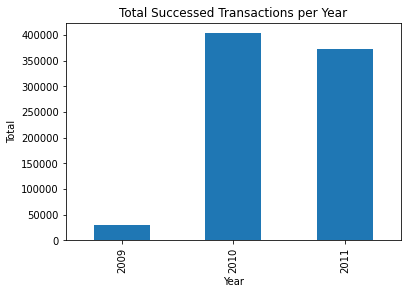

In [254]:
finishedUniques=df_finished['Year'].value_counts()
finishedUniques = finishedUniques.sort_index()

finishedUniques.plot.bar()

plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total Successed Transactions per Year')

plt.show()

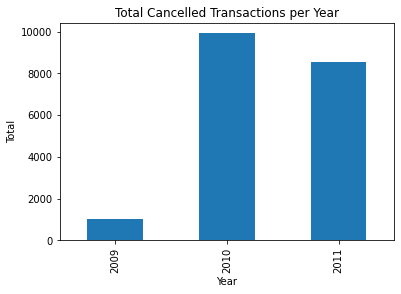

In [255]:
cancelledUniques=df_cancel['Year'].value_counts()
cancelledUniques = cancelledUniques.sort_index()

cancelledUniques.plot.bar()

plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total Cancelled Transactions per Year')

plt.show()

### Cancellation Rate

#### Cancellation rate of transaction

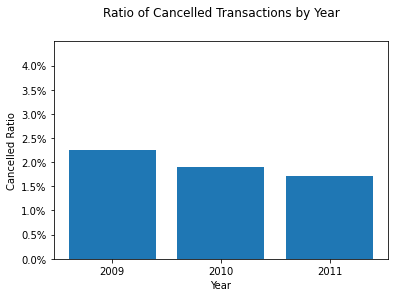

In [256]:
import matplotlib.ticker as ticker

df_ratio = cancelledUniques / dfUniques
year = [2009, 2010, 2011]
plt.bar(df_ratio.index, df_ratio.values)

# Set the chart title and axis labels
plt.title('Ratio of Cancelled Transactions by Year',pad=25)
plt.xlabel('Year')
plt.ylabel('Cancelled Ratio')
plt.ylim(0.0, 0.045)
plt.yticks(np.arange(0.0, 0.044, 0.005))
plt.xticks(year)
# Format the y-axis labels as percentages with one decimal point precision
fmt = ticker.FuncFormatter(lambda x, pos: '{:.1%}'.format(x))
plt.gca().yaxis.set_major_formatter(fmt)


plt.show()


#### Cancellation rate of customer

In [257]:
df_cancel = df[df['Invoice'].str.contains('C', case=False)]
nuniqueCancel = df_cancel.groupby('Year')['Customer ID'].nunique()
nuniqueDf = df.groupby('Year')['Customer ID'].nunique()
print(nuniqueCancel)
print(nuniqueDf)

Year
2009     309
2010    1730
2011    1494
Name: Customer ID, dtype: int64
Year
2009    1045
2010    4289
2011    4244
Name: Customer ID, dtype: int64


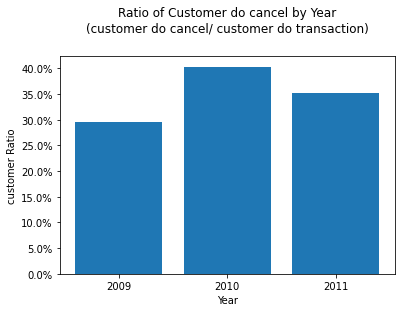

In [258]:
df_cancel = df[df['Invoice'].str.contains('C', case=False)]
nuniqueCancel = df_cancel.groupby('Year')['Customer ID'].nunique()
nuniqueDf = df.groupby('Year')['Customer ID'].nunique()

df_ratio_nunique = nuniqueCancel / nuniqueDf
year = [2009, 2010, 2011]
plt.bar(df_ratio_nunique.index, df_ratio_nunique.values)

# Set the chart title and axis labels
plt.title('Ratio of Customer do cancel by Year\n(customer do cancel/ customer do transaction)',pad=25)

plt.xlabel('Year')
plt.ylabel('customer Ratio')
plt.xticks(year)
# Format the y-axis labels as percentages with one decimal point precision
fmt = ticker.FuncFormatter(lambda x, pos: '{:.1%}'.format(x))
plt.gca().yaxis.set_major_formatter(fmt)

plt.show()

### Interpretation

1. Filtering data Transaksi berhasil dilakukan dengan ketentuan `customer ID` tidak `null`, `Quantity` bernilai `<1`, dan `Invoice` tidak berkode `C`. 
2. Diagram Transaksi berhasil menunjukkan terjadi kenaikan yang signifikan lebih dari 10x dari tahun `2009` ke `2010` dan terjadi penurunan hampir 10% dari tahun `2010` ke `2011`.
3. Filtering data transaksi dibatalkan dilakukan dengan ketentuan pada `Invoice` terdapat kode `C`.
4. Diagram pada Transaksi dibatalkan menunjukkan terjadinya kenaikan yang signifikan lebih dari 8x dari tahun `2009` ke `2010` dan terjadi penurunan +-10% dari tahun `2010` ke `2011`.
5. untuk rasio Transaksi dibatalkan berdasarkan seluruh transaksi pada tahun `2009` hingga `2011` tergolong kecil sekitar 1,7% dan selalu terjadi penurunan di tahun tersebut.
6. untuk rasio Transaksi dibatalkan berdasarkan `customer ID` cukup tinggi tiap tahunnya antara 30%-40% dengan tertinggi di tahun 2010.